In [11]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

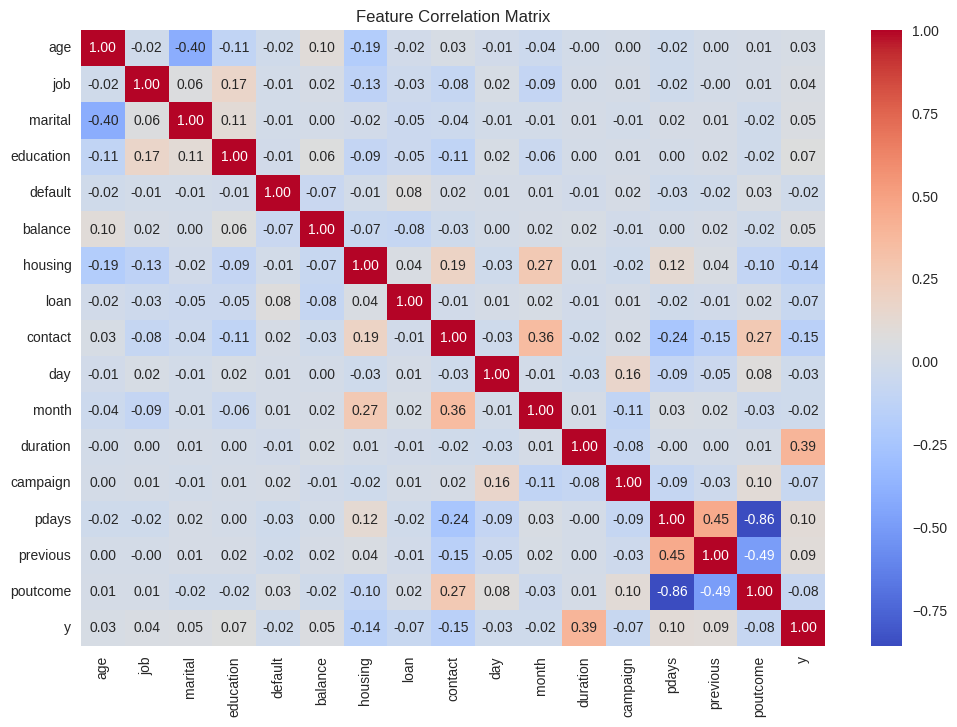

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

#================ LOAD DATA AND PREPROCESS ==================
def load_data(filepath):
    df = pd.read_csv(filepath, sep=';')  # Use semicolon separator for bank-full.csv
    df = df.dropna()

    # Encode categorical columns
    from sklearn.preprocessing import LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Select numeric columns after encoding
    x = df.select_dtypes(include=[np.number])
    if x.empty:
        raise ValueError("No numeric columns found after preprocessing.")

    # Scale features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    return df, x_scaled
def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlation Matrix")
    plt.show()
df, X_scaled = load_data('bank-full.csv')
plot_correlation_matrix(df)

#================ FOR PCA Dimensionality reduction =========
def apply_pca(x, n_components):
    pca = PCA(n_components=n_components)
    x_pca = pca.fit_transform(x)
    return x_pca

#================ FOR K-Means ===============================
def find_optimal_clusters(x, max_clusters=10):
    distortions = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(x)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

def perform_kmeans_clustering(x, n_clusters=None):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(x)
    return labels, kmeans

#================ FOR Agglomerative ===============================
def perform_agglomerative_clustering(x, n_clusters=None):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(x)
    return labels

#================ FOR Dendrogram ===============================
def get_linkages(x):
    return linkage(x, method='ward')

def plot_dendrogram(linked):
    plt.figure(figsize=(10, 5))
    dendrogram(linked)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    Steps:
    1. Load the CSV file (semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the selected features using StandardScaler
    """
    # Load data
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome', 'y']

    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
                'housing', 'loan', 'default']
    X = df[features]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)



Data shape: (45211, 9)


In [5]:
import numpy as np

class KMeansClustering:
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        # Compute Euclidean distance to each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                # Reinitialize empty cluster to a random point
                new_centroids.append(X[np.random.randint(0, X.shape[0])])
            else:
                new_centroids.append(cluster_points.mean(axis=0))
        return np.array(new_centroids)

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                break
            self.centroids = new_centroids
        self.labels = self._assign_clusters(X)
        return self

    def predict(self, X):
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

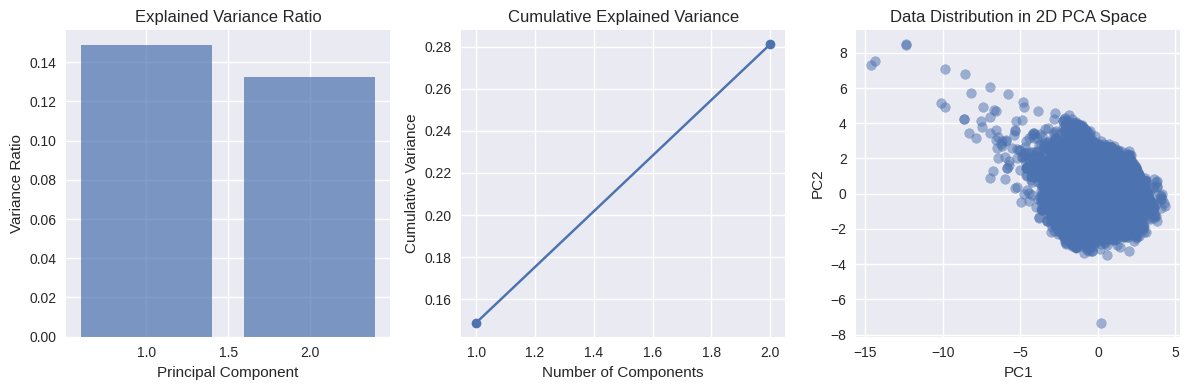

Shape after PCA: (45211, 2)


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction and visualize results."""
    # Initialize and fit PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Create visualizations
    plt.figure(figsize=(12, 4))

    # Explained variance ratio
    plt.subplot(1, 3, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.7)
    plt.title('Explained Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')

    # Cumulative explained variance
    plt.subplot(1, 3, 2)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance')

    # Data distribution in 2D
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.title('Data Distribution in 2D PCA Space')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

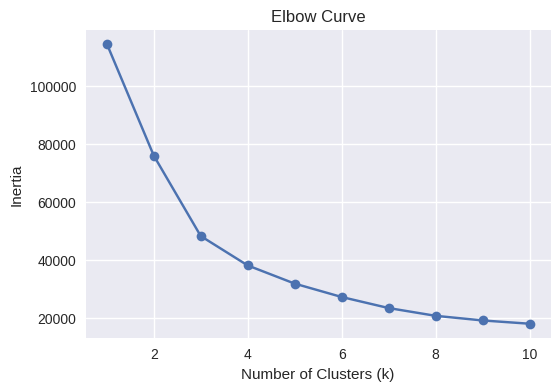

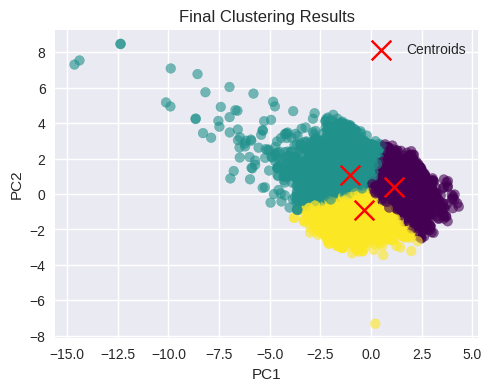

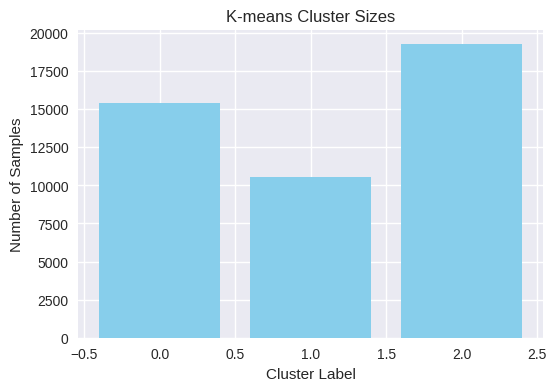

/tmp/ipython-input-472669281.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=labels, y=sil_scores, palette='Set2')


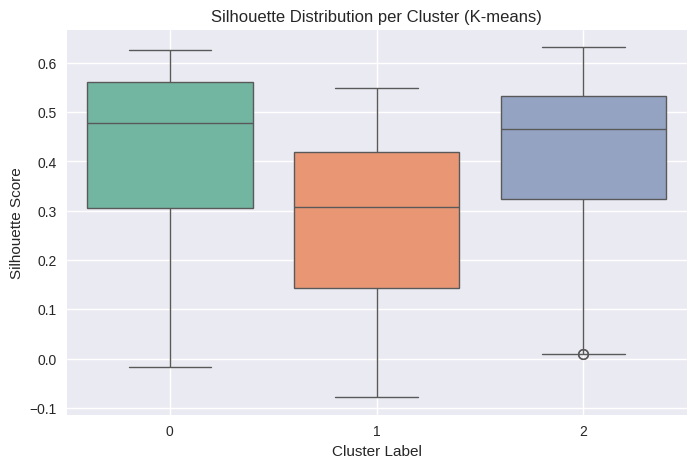

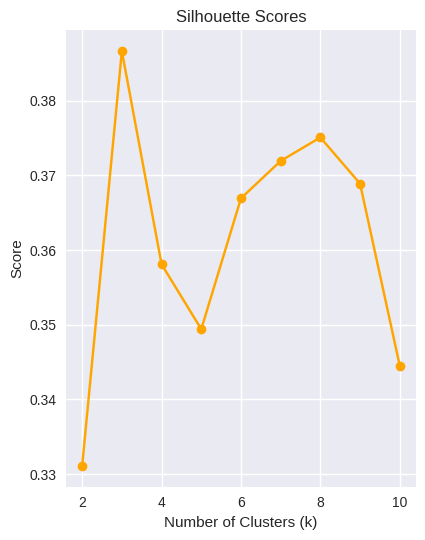


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia)."""
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
        inertia += np.sum(distances ** 2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters."""
    inertias = []
    K = range(1, max_k + 1)

    for k in K:
        model = KMeansClustering(n_clusters=k)
        model.fit(X)
        inertia = calculate_inertia(X, model.labels, model.centroids)
        inertias.append(inertia)

    # Create elbow plot
    plt.figure(figsize=(6, 4))
    plt.plot(K, inertias, marker='o')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Adjust based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

import numpy as np
import matplotlib.pyplot as plt

def plot_kmeans_cluster_sizes(labels):
    """Plot the number of samples in each K-means cluster as a bar chart."""
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(6, 4))
    plt.bar(unique, counts, color='skyblue')
    plt.title("K-means Cluster Sizes")
    plt.xlabel("Cluster Label")
    plt.ylabel("Number of Samples")
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming you already have kmeans.labels from perform_kmeans_clustering
plot_kmeans_cluster_sizes(kmeans.labels)

# Plot silhouette scores for different k
from sklearn.metrics import silhouette_samples


def plot_silhouette_distribution(X_pca, labels):
    """Plot silhouette score distribution per cluster as a box plot."""
    sil_scores = silhouette_samples(X_pca, labels)

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=labels, y=sil_scores, palette='Set2')
    plt.title("Silhouette Distribution per Cluster (K-means)")
    plt.xlabel("Cluster Label")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming you already have X_pca and kmeans.labels
plot_silhouette_distribution(X_pca, kmeans.labels)
plt.subplot(1, 2, 2)
silhouette_scores = []
K = range(2, 11)
for k in K:
    model = KMeansClustering(n_clusters=k)
    model.fit(X_pca)
    score = silhouette_score(X_pca, model.labels)
    silhouette_scores.append(score)

plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [9]:
import numpy as np
from sklearn.cluster import KMeans

class BisectingKMeans:
    """Recursive bisecting K-means clustering."""
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}
        self.centers_ = {}

    def fit_predict(self, X):
        n_samples = X.shape[0]
        self.labels_ = np.zeros(n_samples, dtype=int)
        clusters = {0: np.arange(n_samples)}  # label 0 for all initially
        next_label = 1

        while len(clusters) < self.n_clusters:
            # Select largest cluster to split
            largest = max(clusters, key=lambda k: len(clusters[k]))
            indices = clusters[largest]
            X_subset = X[indices]

            # Binary KMeans on selected cluster
            km = KMeans(n_clusters=2, random_state=self.random_state)
            split_labels = km.fit_predict(X_subset)

            # Assign new labels
            left = indices[split_labels == 0]
            right = indices[split_labels == 1]

            clusters[largest] = left
            clusters[next_label] = right

            self.labels_[right] = next_label

            # Record tree and centroids
            self.split_tree[largest] = (largest, next_label)
            self.centers_[largest] = km.cluster_centers_[0]
            self.centers_[next_label] = km.cluster_centers_[1]

            next_label += 1

        return self.labels_

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!